<a href="https://colab.research.google.com/github/Shalini-Mirani/ADSLAB/blob/main/ADSEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("food_coded.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
df.drop(columns=["employment","comfort_food_reasons","comfort_food_reasons_coded","comfort_food_reasons_coded.1","diet_current_coded","eating_changes_coded","eating_changes_coded1","employment","father_education","father_profession",
                 "fav_cuisine_coded","ideal_diet_coded","income","life_rewarding","marital_status","meals_dinner_friend","mother_education","mother_profession","on_off_campus","parents_cook","pay_meal_out","self_perception_weight",'GPA', 'comfort_food', 'diet_current', 'eating_changes', 'fav_cuisine',
       'food_childhood', 'healthy_meal', 'ideal_diet', 'type_sports',
       'weight'],axis=1,inplace=True)
df.columns

Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'cook', 'cuisine', 'drink', 'eating_out',
       'ethnic_food', 'exercise', 'fav_food', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'indian_food',
       'italian_food', 'nutritional_check', 'persian_food', 'soup', 'sports',
       'thai_food', 'tortilla_calories', 'turkey_calories', 'veggies_day',
       'vitamins', 'waffle_calories'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

Gender                0
breakfast             0
calories_chicken      0
calories_day         19
calories_scone        1
coffee                0
cook                  3
cuisine              17
drink                 2
eating_out            0
ethnic_food           0
exercise             13
fav_food              2
fries                 0
fruit_day             0
grade_level           0
greek_food            0
healthy_feeling       0
indian_food           0
italian_food          0
nutritional_check     0
persian_food          1
soup                  1
sports                2
thai_food             0
tortilla_calories     1
turkey_calories       0
veggies_day           0
vitamins              0
waffle_calories       0
dtype: int64


In [ ]:
df[['calories_day','calories_scone','cook','cuisine',
    'drink','exercise','fav_food','persian_food',
    'soup','sports','tortilla_calories']] = df[['calories_day','calories_scone',
                                                'cook','cuisine',
    'drink','exercise','fav_food','persian_food',
    'soup','sports','tortilla_calories']].replace(0,np.NaN)
df.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,cook,cuisine,drink,eating_out,...,nutritional_check,persian_food,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
0,2,1,430,NaN,315.0,1,2.0,NaN,1.0,3,...,5,5.0,1.0,1.0,1,1165.0,345,5,1,1315
1,1,1,610,3.0,420.0,2,3.0,1.0,2.0,2,...,4,4.0,1.0,1.0,2,725.0,690,4,2,900
2,1,1,720,4.0,420.0,2,1.0,3.0,1.0,2,...,4,5.0,1.0,2.0,5,1165.0,500,5,1,900
3,1,1,430,3.0,420.0,2,2.0,2.0,2.0,2,...,2,5.0,1.0,2.0,5,725.0,690,3,1,1315
4,1,1,720,2.0,420.0,2,1.0,2.0,2.0,2,...,3,2.0,1.0,1.0,4,940.0,500,4,2,760


In [ ]:
def missing_percent(df):
    missval = df.isnull().sum()
    misspercent = 100 * df.isnull().sum() / len(df)
    misstable = pd.concat([missval, misspercent], axis=1)
    misscol = misstable.rename(
        columns={0: 'Missing Values', 1: 'Percent of Total values'})
    misscol = misscol[
        misscol.iloc[:, 1] != 0].sort_values(
            'Percent of Total values', ascending=False).round(2)
    print("Your selected dataframe has" + str(df.shape[1]) + " columns.\n" +
          "There are" + str(misscol.shape[0]) +
          " columns that have missing values")
    return misscol

In [ ]:
misscolinfo = missing_percent(df)
misscolinfo

Your selected dataframe has30 columns.
There are11 columns that have missing values


,Missing Values,Percent of Total values
calories_day,19,15.2
cuisine,17,13.6
exercise,13,10.4
cook,3,2.4
drink,2,1.6
fav_food,2,1.6
sports,2,1.6
calories_scone,1,0.8
persian_food,1,0.8
soup,1,0.8


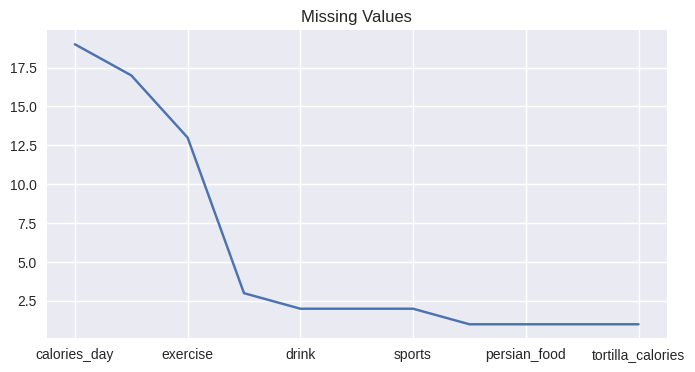

In [ ]:
from matplotlib import pyplot as plt
misscolinfo['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
columns_to_check = ['calories_day','calories_scone','cook','cuisine',
    'drink','exercise','fav_food','persian_food',
    'soup','sports','tortilla_calories']

def print_outlier_count(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Outliers count in {column}: {outliers_count}")
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

for column in columns_to_check:
    print_outlier_count(column)

Outliers count in calories_day: 43
Outliers count in calories_scone: 30
Outliers count in cook: 4
Outliers count in cuisine: 6
Outliers count in drink: 0
Outliers count in exercise: 0
Outliers count in fav_food: 0
Outliers count in persian_food: 0
Outliers count in soup: 0
Outliers count in sports: 0
Outliers count in tortilla_calories: 0


In [ ]:
df_drop = df.copy()

In [ ]:
drop_cols = misscolinfo[misscolinfo['Percent of Total values'] > 10]
drop_cols

,Missing Values,Percent of Total values
calories_day,19,15.2
cuisine,17,13.6
exercise,13,10.4


In [ ]:
col_names = drop_cols.index.tolist()
col_names

['calories_day', 'cuisine', 'exercise']

In [ ]:
df_drop.drop(col_names, axis = 1, inplace=True)
df_drop.head()

,Gender,breakfast,calories_chicken,calories_scone,coffee,cook,drink,eating_out,ethnic_food,fav_food,...,nutritional_check,persian_food,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
1,1,1,610,420.0,2,3.0,2.0,2,4,1.0,...,4,4.0,1.0,1.0,2,725.0,690,4,2,900
6,2,1,610,420.0,2,2.0,1.0,2,5,1.0,...,4,5.0,1.0,1.0,5,940.0,690,4,1,1315
7,1,1,720,420.0,1,3.0,2.0,2,2,1.0,...,4,1.0,1.0,2.0,1,725.0,500,4,2,1315
8,1,1,430,420.0,1,3.0,1.0,5,5,3.0,...,2,5.0,2.0,2.0,5,725.0,345,3,2,760
13,1,1,610,420.0,2,2.0,2.0,4,5,1.0,...,2,3.0,1.0,1.0,5,1165.0,850,5,2,1315


In [ ]:
colmean = df[columns_to_check].mean()
print(colmean)

calories_day           3.000000
calories_scone       420.000000
cook                   2.690476
cuisine                1.000000
drink                  1.547619
exercise               1.666667
fav_food               1.809524
persian_food           2.833333
soup                   1.261905
sports                 1.380952
tortilla_calories    950.487805
dtype: float64


In [ ]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer_output = mean_imputer.fit_transform(df[columns_to_check])
df[columns_to_check] = imputer_output
print(df)

     Gender  breakfast  calories_chicken  calories_day  calories_scone  \
1         1          1               610           3.0           420.0   
6         2          1               610           3.0           420.0   
7         1          1               720           3.0           420.0   
8         1          1               430           3.0           420.0   
13        1          1               610           3.0           420.0   
14        2          1               610           3.0           420.0   
16        1          1               265           3.0           420.0   
23        2          2               610           3.0           420.0   
25        1          2               720           3.0           420.0   
30        1          1               720           3.0           420.0   
31        2          1               610           3.0           420.0   
34        1          1               610           3.0           420.0   
36        1          1               6

In [ ]:
colmedian = df[columns_to_check].median()
print(colmedian)

calories_day           3.000000
calories_scone       420.000000
cook                   3.000000
cuisine                1.000000
drink                  2.000000
exercise               1.666667
fav_food               1.000000
persian_food           3.000000
soup                   1.000000
sports                 1.000000
tortilla_calories    940.000000
dtype: float64


In [ ]:
linear_imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
imputer_output = linear_imputer.fit_transform(df[columns_to_check])
df[columns_to_check] = imputer_output
print(df)

     Gender  breakfast  calories_chicken  calories_day  calories_scone  \
1         1          1               610           3.0           420.0   
6         2          1               610           3.0           420.0   
7         1          1               720           3.0           420.0   
8         1          1               430           3.0           420.0   
13        1          1               610           3.0           420.0   
14        2          1               610           3.0           420.0   
16        1          1               265           3.0           420.0   
23        2          2               610           3.0           420.0   
25        1          2               720           3.0           420.0   
30        1          1               720           3.0           420.0   
31        2          1               610           3.0           420.0   
34        1          1               610           3.0           420.0   
36        1          1               6

In [ ]:
# 1. Replace NaN values with the next or previous value
df_next = df.fillna(method='ffill')  # forward fill
df_prev = df.fillna(method='bfill') #backwardfill
print("Next or Previous Value:\n", df_next)

Next or Previous Value:
      Gender  breakfast  calories_chicken  calories_day  calories_scone  \
1         1          1               610           3.0           420.0   
6         2          1               610           3.0           420.0   
7         1          1               720           3.0           420.0   
8         1          1               430           3.0           420.0   
13        1          1               610           3.0           420.0   
14        2          1               610           3.0           420.0   
16        1          1               265           3.0           420.0   
23        2          2               610           3.0           420.0   
25        1          2               720           3.0           420.0   
30        1          1               720           3.0           420.0   
31        2          1               610           3.0           420.0   
34        1          1               610           3.0           420.0   
36        1  

In [ ]:
#K Nearest Neighbors (KNN) imputation
imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nK Nearest Neighbors (KNN) Imputation:\n", df_knn)


K Nearest Neighbors (KNN) Imputation:
     Gender  breakfast  calories_chicken  calories_day  calories_scone  coffee  \
0      1.0        1.0             610.0           3.0           420.0     2.0   
1      2.0        1.0             610.0           3.0           420.0     2.0   
2      1.0        1.0             720.0           3.0           420.0     1.0   
3      1.0        1.0             430.0           3.0           420.0     1.0   
4      1.0        1.0             610.0           3.0           420.0     2.0   
5      2.0        1.0             610.0           3.0           420.0     2.0   
6      1.0        1.0             265.0           3.0           420.0     1.0   
7      2.0        2.0             610.0           3.0           420.0     2.0   
8      1.0        2.0             720.0           3.0           420.0     2.0   
9      1.0        1.0             720.0           3.0           420.0     2.0   
10     2.0        1.0             610.0           3.0           420.0